## Imports

In [11]:
pip install pillow

     |████████████████████████████████| 2.2 MB 2.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
#Keras imports
import tensorflow as tf
import tensorflow.keras.preprocessing as preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from PIL import Image

## Pathways

In [18]:
not_path = os.listdir("../Data/Images")
not_path.remove(".DS_Store") #it likes to pop up from time to time

data_path = os.path.join('..', 'Data')

train_dir = os.path.join(data_path, 'ExModeling_train')
test_dir = os.path.join(data_path, 'ExModeling_test')
val_dir = os.path.join(data_path, 'ExModeling_val')

Ex_test_path = os.path.join(data_path, 'ExModeling_test')
Ex_train_path = os.path.join(data_path, 'ExModeling_train')
Ex_val_path = os.path.join(data_path, 'ExModeling_val')

## vis method

In [3]:
def vis_history(history): 
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

## Modeling

In [76]:
img_size = 150
bch_size = 20

In [87]:
img_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=False, vertical_flip=False)

train_generator = img_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical')

validation_generator = img_gen.flow_from_directory(
    val_dir, 
    target_size=(img_size, img_size), 
    color_mode='rgb',
    batch_size=bch_size, 
    class_mode='categorical')

test_generator = img_gen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical',
    shuffle=False)


Found 752 images belonging to 4 classes.
Found 98 images belonging to 4 classes.
Found 92 images belonging to 4 classes.


In [6]:
fsm_ = models.Sequential() 
fsm_.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
fsm_.add(layers.Conv2D(64, (3, 3), activation='relu'))
fsm_.add(layers.MaxPooling2D((2, 2)))
fsm_.add(layers.Conv2D(128, (3, 3), activation='relu'))
fsm_.add(layers.MaxPooling2D((2, 2)))
fsm_.add(layers.Conv2D(128, (3, 3)))
fsm_.add(layers.MaxPooling2D((2, 2)))
fsm_.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
fsm_.add(layers.MaxPooling2D((2, 2)))
fsm_.add(layers.Flatten())
fsm_.add(layers.Dense(64, activation='relu'))
fsm_.add(layers.Dense(64, activation='relu'))
fsm_.add(layers.Dense(128, activation='relu',))
fsm_.add(layers.Dense(4, activation='softmax'))

fsm_.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_fsm = fsm_.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

W1018 12:50:39.026557 4728434112 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1018 12:50:39.063192 4728434112 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1018 12:50:39.073781 4728434112 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1018 12:50:39.134627 4728434112 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.m

Epoch 1/10
100/100 [==============================] - 197s 2s/step - loss: 47.1969 - acc: 0.3433 - val_loss: 35.0565 - val_acc: 0.3163
Epoch 2/10
100/100 [==============================] - 1120s 11s/step - loss: 26.1198 - acc: 0.4772 - val_loss: 18.2588 - val_acc: 0.5918
Epoch 3/10
100/100 [==============================] - 3010s 30s/step - loss: 12.8735 - acc: 0.5453 - val_loss: 8.3936 - val_acc: 0.3673
Epoch 4/10
100/100 [==============================] - 715s 7s/step - loss: 5.4297 - acc: 0.5550 - val_loss: 3.6168 - val_acc: 0.4490
Epoch 5/10
100/100 [==============================] - 210s 2s/step - loss: 2.6763 - acc: 0.5907 - val_loss: 2.0938 - val_acc: 0.6429
Epoch 6/10
100/100 [==============================] - 195s 2s/step - loss: 1.9426 - acc: 0.6030 - val_loss: 1.7141 - val_acc: 0.6531
Epoch 7/10
100/100 [==============================] - 1000s 10s/step - loss: 1.6282 - acc: 0.6236 - val_loss: 1.4246 - val_acc: 0.7347
Epoch 8/10
100/100 [==============================] - 4374

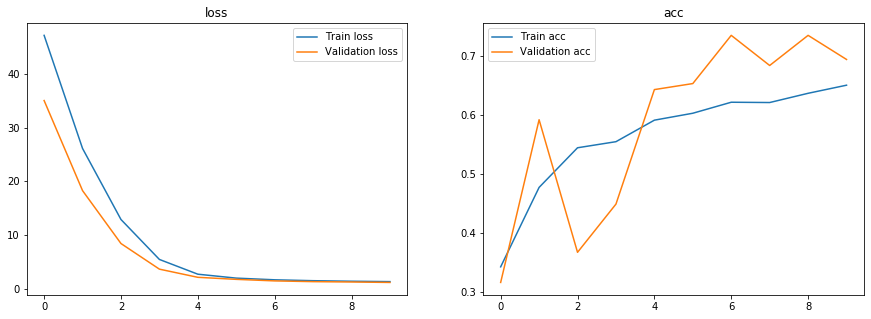

In [7]:
vis_history(history_fsm)

In [101]:
test_loss, test_acc = fsm_.evaluate_generator(test_generator, steps=50)
print(test_acc, test_loss)

0.5978260778862498 1.3621025759240855


Note: as there are only 4 breeds, I might as well test them one by one to see in what way the model may be getting things wrong

In [96]:
def pred_breed_im(breed):
    
    abs_path = '../Data/ExModeling_val/'
    dog_path = os.path.join(abs_path, breed)
    
    val_images = os.listdir(dog_path)
    
    val_data = []

    for image in val_images:

        img_path = os.path.join(dog_path, image)

        im = Image.open(img_path)
        
        #im_as_array = np.asarray(im)

        val_data.append(im)
        
    #val_data_array = np.asarray(val_data)

    return val_data#_array

That went better than I though it would, this model was unchanged from the final one of my capstone project yet netted a much better accuracy score (while keeping in mind that I was using 5 rather than 4 breeds most of the time)

It also looks like it could maybe have gone a few more epochs, next time I'll change up the image size to the average of all the traning images and run it for 15 epochs